# Lexical Resources

## Setup

In [1]:
import nltk
nltk.download("book")
from nltk import book
from nltk.corpus import stopwords, swadesh

import networkx as nx 
import matplotlib.pyplot as plt

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/mmenendezg/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/mmenendezg/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/mmenendezg/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/mmenendezg/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/mmenendezg/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/mmenendezg/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Lexical Resources

In [2]:
text1 = book.text1

In [3]:
# Vocabulary
vocab = sorted(set(text1))

In [4]:
# Distribution
text1_dist = book.FreqDist(text1)

In [5]:
# Stopwords
def stopwords_percentage(text):
    stop_wd = stopwords.words("english")
    content = [w for w in text if w.lower() not in stop_wd]

    percentage = len(content)/len(text)
    print(f"The percentage of stopwords is: {(1 - percentage) * 100:.2f}%")
    print(f"The percentage of content is: {percentage * 100:.2f}%")


In [6]:
stopwords_percentage(text1)

The percentage of stopwords is: 41.37%
The percentage of content is: 58.63%


## Enriched Lexicon

In [7]:
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [8]:
len(swadesh.words("en"))

207

In [9]:
fr2es = swadesh.entries(["fr", "es"])
print(fr2es)

[('je', 'yo'), ('tu, vous', 'tú, usted'), ('il', 'él'), ('nous', 'nosotros'), ('vous', 'vosotros, ustedes'), ('ils, elles', 'ellos, ellas'), ('ceci', 'este'), ('cela', 'ese, aquel'), ('ici', 'aquí, acá'), ('là', 'ahí, allí, allá'), ('qui', 'quien'), ('quoi', 'que'), ('où', 'donde'), ('quand', 'cuando'), ('comment', 'como'), ('ne...pas', 'no'), ('tout', 'todo'), ('plusieurs', 'muchos'), ('quelques', 'algunos, unos'), ('peu', 'poco'), ('autre', 'otro'), ('un', 'uno'), ('deux', 'dos'), ('trois', 'tres'), ('quatre', 'cuatro'), ('cinq', 'cinco'), ('grand', 'grande'), ('long', 'largo'), ('large', 'ancho'), ('épais', 'gordo'), ('lourd', 'pesado'), ('petit', 'pequeño'), ('court', 'corto'), ('étroit', 'estrecho, angosto'), ('mince', 'delgado, flaco'), ('femme', 'mujer'), ('homme', 'hombre'), ('homme', 'hombre'), ('enfant', 'niño'), ('femme, épouse', 'esposa, mujer'), ('mari, époux', 'esposo, marido'), ('mère', 'madre'), ('père', 'padre'), ('animal', 'animal'), ('poisson', 'pez, pescado'), ('ois

In [10]:
translate = dict(fr2es)
translate['chien']

'perro'

In [11]:
translate['jeter']

'tirar'

## WordNet

In [12]:
nltk.download("omw-1.4")
nltk.download("wordnet")
from nltk.corpus import wordnet as wn


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mmenendezg/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mmenendezg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
# Synset: grupo de sinonimos
ss = wn.synsets("carro", lang="spa")
ss

[Synset('car.n.01'),
 Synset('carriage.n.04'),
 Synset('carrier.n.02'),
 Synset('cart.n.01'),
 Synset('chariot.n.02'),
 Synset('cartload.n.01')]

In [14]:
# Let's explore a Synset
for syn in ss:
    print(syn.name(), "\t: ", syn.definition())
    for name in syn.lemma_names():
        print(f"\t* {name}")

car.n.01 	:  a motor vehicle with four wheels; usually propelled by an internal combustion engine
	* car
	* auto
	* automobile
	* machine
	* motorcar
carriage.n.04 	:  a machine part that carries something else
	* carriage
carrier.n.02 	:  a self-propelled wheeled vehicle designed specifically to carry something
	* carrier
cart.n.01 	:  a heavy open wagon usually having two wheels and drawn by an animal
	* cart
chariot.n.02 	:  a two-wheeled horse-drawn battle vehicle; used in war and races in ancient Egypt and Greece and Rome
	* chariot
cartload.n.01 	:  the quantity that a cart holds
	* cartload


In [15]:
ss[0].hyponyms()

[Synset('ambulance.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('bus.n.04'),
 Synset('cab.n.03'),
 Synset('compact.n.03'),
 Synset('convertible.n.01'),
 Synset('coupe.n.01'),
 Synset('cruiser.n.01'),
 Synset('electric.n.01'),
 Synset('gas_guzzler.n.01'),
 Synset('hardtop.n.01'),
 Synset('hatchback.n.01'),
 Synset('horseless_carriage.n.01'),
 Synset('hot_rod.n.01'),
 Synset('jeep.n.01'),
 Synset('limousine.n.01'),
 Synset('loaner.n.02'),
 Synset('minicar.n.01'),
 Synset('minivan.n.01'),
 Synset('model_t.n.01'),
 Synset('pace_car.n.01'),
 Synset('racer.n.02'),
 Synset('roadster.n.01'),
 Synset('sedan.n.01'),
 Synset('sport_utility.n.01'),
 Synset('sports_car.n.01'),
 Synset('stanley_steamer.n.01'),
 Synset('stock_car.n.01'),
 Synset('subcompact.n.01'),
 Synset('touring_car.n.01'),
 Synset('used-car.n.01')]

In [16]:
ss[0].hypernyms()

[Synset('motor_vehicle.n.01')]

In [17]:
def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()
    labels = {}

    def recurse(s):
        if not s in seen:
            seen.add(s)
            labels[s.name] = s.name().split('.')[0]
            graph.add_node(s.name)
            for s1 in fn(s):
                graph.add_node(s1.name)
                graph.add_edge(s.name, s1.name)
                recurse(s1)
    recurse(synset)
    return graph, labels


def draw_text_graph(G, labels):
    plt.figure(figsize=(18, 12))
    pos = nx.planar_layout(G, scale=18)
    nx.draw_networkx_nodes(G, pos, node_color="red", linewidths=0, node_size=500)
    nx.draw_networkx_labels(G, pos, font_size=20, labels=labels)
    nx.draw_networkx_edges(G, pos)
    plt.xticks([])
    plt.yticks([])

## Hyponyms

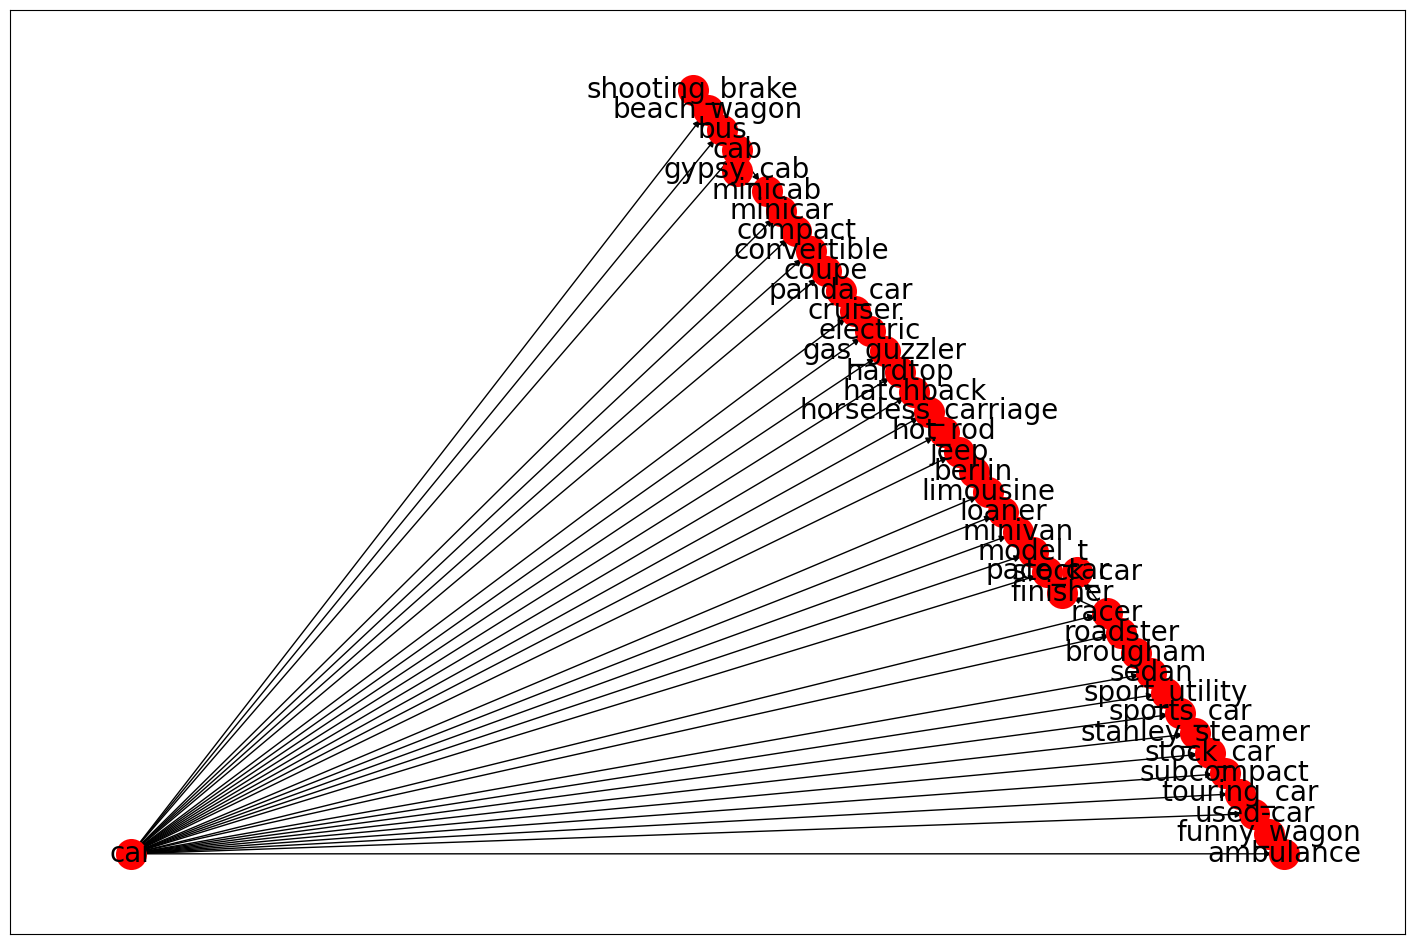

In [18]:
G, labels = closure_graph(ss[0], lambda s: s.hyponyms())
draw_text_graph(G, labels)

## Hypernyms

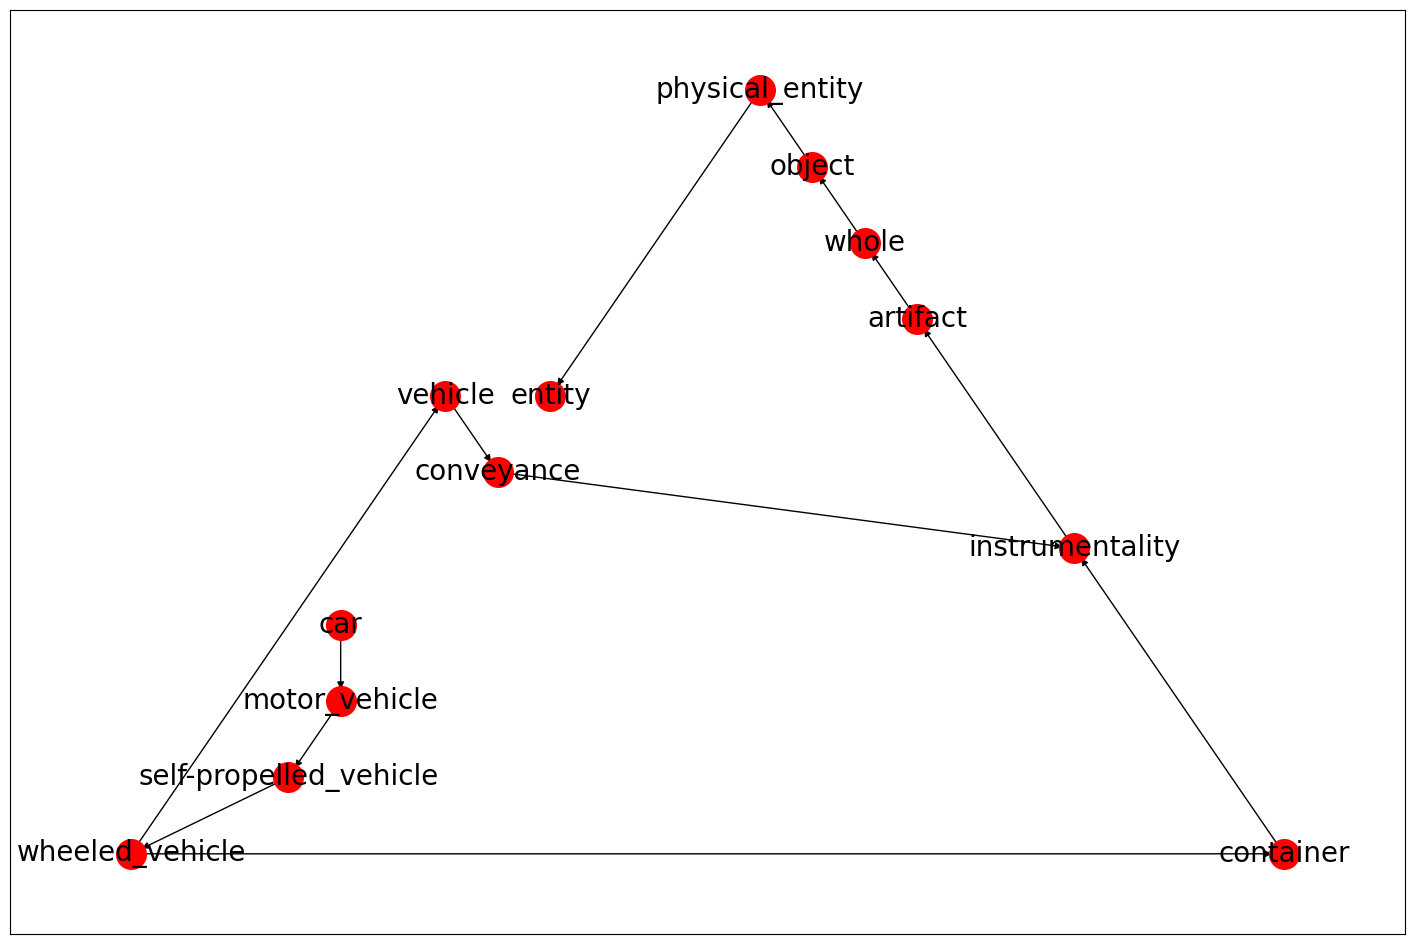

In [19]:
G, labels = closure_graph(ss[0], lambda s: s.hypernyms())
draw_text_graph(G, labels)

## Semantic Similarity

In [20]:
def show_syns(word, lang='spa'):
    ss = wn.synsets(word, lang=lang)
    for syn in ss:
        print(f"{syn.name()} : {syn.definition()}")
        for name in syn.lemma_names():
            print(f"\t* {name}")
    return ss

In [21]:
ss = show_syns("perro")

dog.n.01 : a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
	* dog
	* domestic_dog
	* Canis_familiaris
rotter.n.01 : a person who is deemed to be despicable or contemptible
	* rotter
	* dirty_dog
	* rat
	* skunk
	* stinker
	* stinkpot
	* bum
	* puke
	* crumb
	* lowlife
	* scum_bag
	* so-and-so
	* git


In [22]:
ss2 = show_syns("gato")

cat.n.01 : feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
	* cat
	* true_cat
tom.n.02 : male cat
	* tom
	* tomcat
dodger.n.01 : a shifty deceptive person
	* dodger
	* fox
	* slyboots


In [23]:
ss3 = show_syns("animal")

animal.n.01 : a living organism characterized by voluntary movement
	* animal
	* animate_being
	* beast
	* brute
	* creature
	* fauna
beast.n.02 : a cruelly rapacious person
	* beast
	* wolf
	* savage
	* brute
	* wildcat
dunce.n.01 : a stupid person; these words are used to express a low opinion of someone's intelligence
	* dunce
	* dunderhead
	* numskull
	* blockhead
	* bonehead
	* lunkhead
	* hammerhead
	* knucklehead
	* loggerhead
	* muttonhead
	* shithead
	* dumbass
	* fuckhead


In [24]:
perro = ss[0]
gato = ss2[0]
animal = ss3[0]

In [25]:
animal.path_similarity(perro)

0.3333333333333333

In [26]:
animal.path_similarity(gato)

0.125

In [27]:
perro.path_similarity(gato)

0.2